# Research Project

In [68]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

import numpy as np
from sklearn.tree import DecisionTreeClassifier

from matplotlib import cm

from sklearn import datasets
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , f1_score 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.ensemble import RandomForestClassifier


from sklearn import svm, datasets

from sklearn import svm
from sklearn.svm import LinearSVC

# PCA
here we load the dataset, by grabbing the images and converting a 64x64x3 image and flattening it to fit in a row with 

In [43]:


# Function to load and preprocess the dataset


def load_dataset(path):
    images = []
    labels = []
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image = Image.open(os.path.join(
                    class_path, image_file)).convert('RGB')
                image = image.resize((64, 64))  # Resize images for consistency
                # Flatten the image into a 1D array
                image = np.array(image).flatten()
                images.append(image)
                labels.append(class_dir)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# Each row is a flattened image and the columns represent the pixels in 3 channels 64*64*3
# Load the dataset
images, labels = load_dataset('/Users/henriquerio/Documents/IIT/FALL2024/csp571_Project/data')


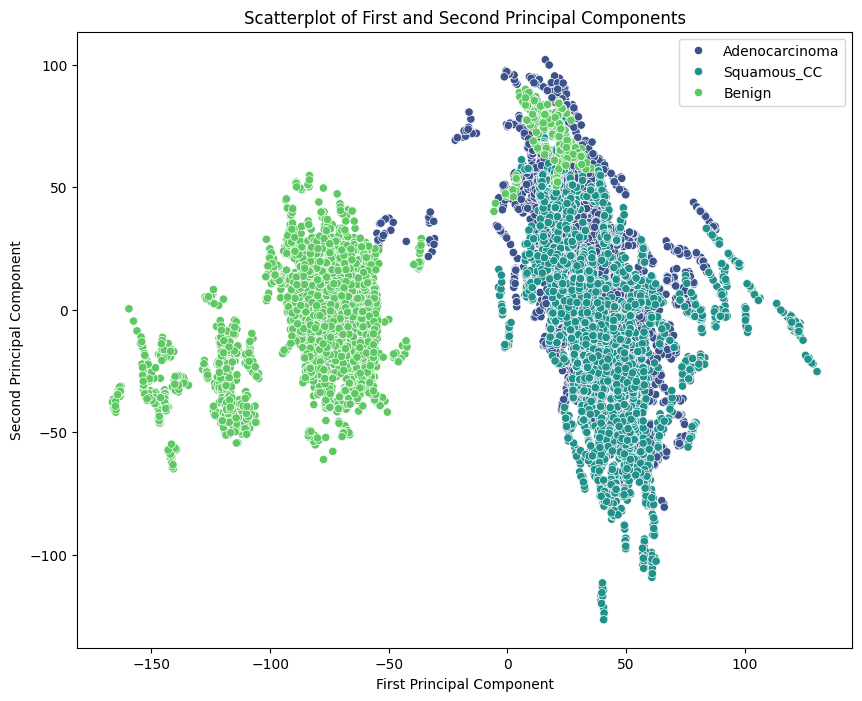

In [44]:
scaler = StandardScaler()
images_scaled = scaler.fit_transform(images)


# Step 2: First PCA
n_components = 50
pca = PCA(n_components=n_components)
images_pca = pca.fit_transform(images_scaled)


plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=images_pca[:, 0],
    y=images_pca[:, 1],
    hue=labels,
    palette='viridis',
    legend='full'
)

plt.title('Scatterplot of First and Second Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5475877814157518..0.8067862524733262].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8007425998504631..1.0832673423659067].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.2105168435354565..1.633489589889752].


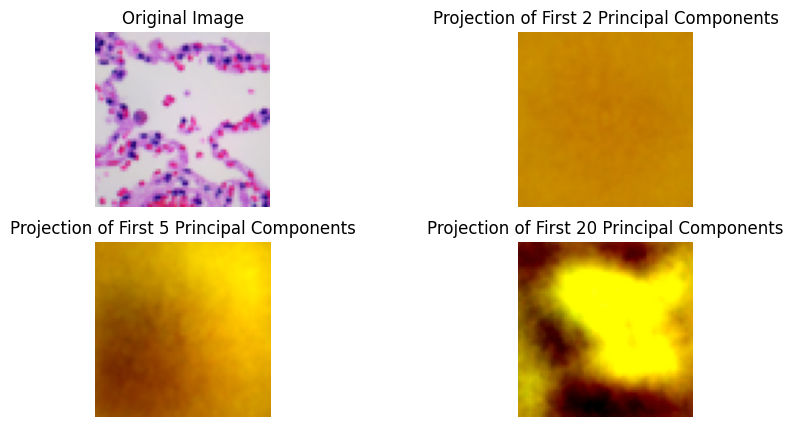

In [45]:

index= 10000
image_flat = images_scaled[index]  

pca_2 = PCA(n_components=2)
pca_2.fit(images_scaled.reshape(images_scaled.shape[0], -1))
image_pca_2 = pca_2.transform(image_flat.reshape(1, -1))

image_reconstructed_2 = pca_2.inverse_transform(image_pca_2)

image_reconstructed_reshaped_2 = image_reconstructed_2.reshape(64, 64, 3)

pca_5= PCA(n_components=5)
pca_5.fit(images_scaled.reshape(images_scaled.shape[0], -1))
image_pca_5 = pca_5.transform(image_flat.reshape(1, -1))

image_reconstructed_5 = pca_5.inverse_transform(image_pca_5)

image_reconstructed_reshaped_5 = image_reconstructed_5.reshape(64, 64, 3)

pca_20 = PCA(n_components=20)
pca_20.fit(images_scaled.reshape(images_scaled.shape[0], -1))
image_pca_20 = pca_20.transform(image_flat.reshape(1, -1))

image_reconstructed_20 = pca_20.inverse_transform(image_pca_20)

image_reconstructed_reshaped_20 = image_reconstructed_20.reshape(64, 64, 3)



plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(images[index].reshape(64, 64, 3).astype(np.uint8))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_reconstructed_reshaped_2)
plt.title("Projection of First 2 Principal Components")
plt.axis('off')


plt.subplot(2, 2, 3)
plt.imshow(image_reconstructed_reshaped_5)
plt.title("Projection of First 5 Principal Components")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_reconstructed_reshaped_20)
plt.title("Projection of First 20 Principal Components")
plt.axis('off')

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04862369423621851..1.3396555110607624].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.41333306067852843..1.599224724902264].


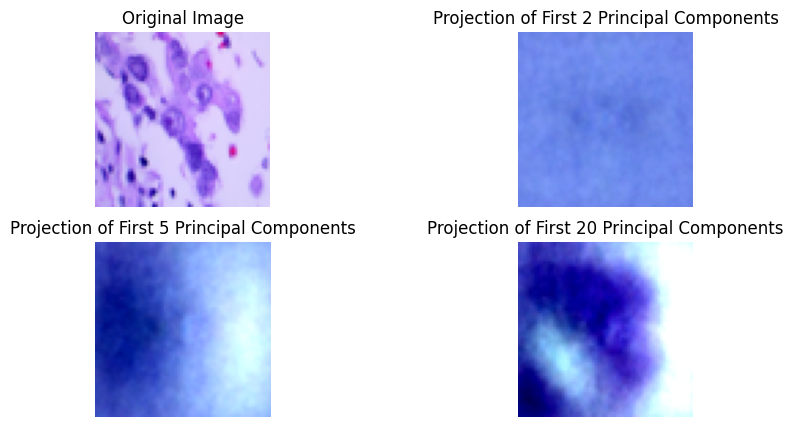

In [46]:

index = 10
image_flat = images_scaled[index]

pca_2 = PCA(n_components=2)
pca_2.fit(images_scaled.reshape(images_scaled.shape[0], -1))
image_pca_2 = pca_2.transform(image_flat.reshape(1, -1))

image_reconstructed_2 = pca_2.inverse_transform(image_pca_2)

image_reconstructed_reshaped_2 = image_reconstructed_2.reshape(64, 64, 3)

pca_5 = PCA(n_components=5)
pca_5.fit(images_scaled.reshape(images_scaled.shape[0], -1))
image_pca_5 = pca_5.transform(image_flat.reshape(1, -1))

image_reconstructed_5 = pca_5.inverse_transform(image_pca_5)
image_reconstructed_reshaped_5 = image_reconstructed_5.reshape(64, 64, 3)

pca_20 = PCA(n_components=20)
pca_20.fit(images_scaled.reshape(images_scaled.shape[0], -1))
image_pca_20 = pca_20.transform(image_flat.reshape(1, -1))

image_reconstructed_20 = pca_20.inverse_transform(image_pca_20)

image_reconstructed_reshaped_20 = image_reconstructed_20.reshape(64, 64, 3)


plt.figure(figsize=(10, 5))
plt.subplot(2, 2, 1)
plt.imshow(images[index].reshape(64, 64, 3).astype(np.uint8))
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(image_reconstructed_reshaped_2)
plt.title("Projection of First 2 Principal Components")
plt.axis('off')


plt.subplot(2, 2, 3)
plt.imshow(image_reconstructed_reshaped_5)
plt.title("Projection of First 5 Principal Components")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(image_reconstructed_reshaped_20)
plt.title("Projection of First 20 Principal Components")
plt.axis('off')

plt.show()


# PCA in Grayscale

In [47]:
# Function to load and preprocess the dataset


def load_dataset_gray(path):
    images = []
    labels = []
    for class_dir in os.listdir(path):
        class_path = os.path.join(path, class_dir)
        if os.path.isdir(class_path):
            for image_file in os.listdir(class_path):
                image = Image.open(os.path.join(
                    class_path, image_file)).convert('L')
                image = image.resize((64, 64))  # Resize images for consistency
                # Flatten the image into a 1D array
                image = np.array(image).flatten()
                images.append(image)
                labels.append(class_dir)

    images = np.array(images)
    labels = np.array(labels)

    return images, labels


# Each row is a flattened image and the columns represent the pixels in 1 channel 64*64*
# Load the dataset
images_gray, labels = load_dataset_gray(
    '/Users/henriquerio/Documents/IIT/FALL2024/csp571_Project/data')




In [48]:
images_gray.shape

(15000, 4096)

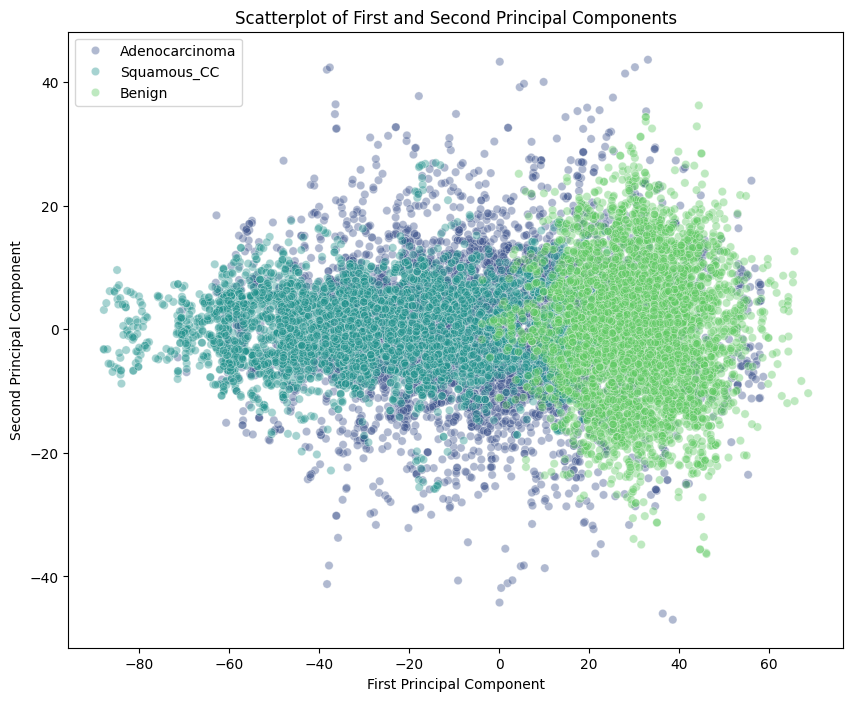

In [49]:
scaler = StandardScaler()
images_scaled_gray = scaler.fit_transform(images_gray)


n_components = 50
pca = PCA(n_components=n_components)
images_pca_gray = pca.fit_transform(images_scaled_gray)




plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=images_pca_gray[:, 0],
    y=images_pca_gray[:, 1],
    hue=labels,
    palette='viridis',
    legend='full',
    alpha=0.4
)

plt.title('Scatterplot of First and Second Principal Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()



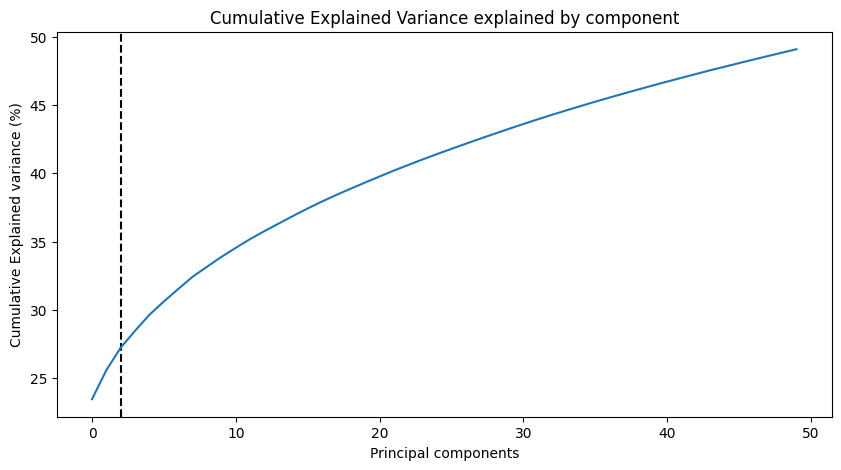

In [50]:
pca = PCA(n_components=50)
pca.fit(images_gray)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100



plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=2, color="k", linestyle="--")
ax = plt.plot(var_cumu)

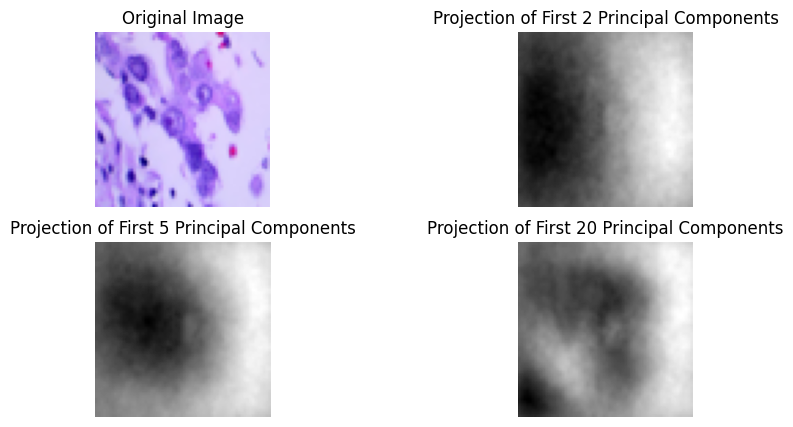

In [51]:
index = 10
image_flat = images_scaled_gray[index]

pca_2 = PCA(n_components=2)
pca_2.fit(images_scaled_gray.reshape(images_scaled_gray.shape[0], -1))
image_pca_2 = pca_2.transform(image_flat.reshape(1, -1))

image_reconstructed_2 = pca_2.inverse_transform(image_pca_2)

image_reconstructed_reshaped_2 = image_reconstructed_2.reshape(64, 64)

pca_5 = PCA(n_components=5)
pca_5.fit(images_scaled_gray.reshape(images_scaled_gray.shape[0], -1))
image_pca_5 = pca_5.transform(image_flat.reshape(1, -1))

image_reconstructed_5 = pca_5.inverse_transform(image_pca_5)

image_reconstructed_reshaped_5 = image_reconstructed_5.reshape(64, 64)

pca_20 = PCA(n_components=20)
pca_20.fit(images_scaled_gray.reshape(images_scaled_gray.shape[0], -1))
image_pca_20 = pca_20.transform(image_flat.reshape(1, -1))

image_reconstructed_20 = pca_20.inverse_transform(image_pca_20)

image_reconstructed_reshaped_20 = image_reconstructed_20.reshape(64, 64)


plt.figure(figsize=(10, 5))

# Original image (assuming it's in RGB format)
plt.subplot(2, 2, 1)
plt.imshow(images[index].reshape(64, 64, 3).astype(np.uint8))
plt.title("Original Image")
plt.axis('off')

# Projection with 2 principal components
plt.subplot(2, 2, 2)
plt.imshow(image_reconstructed_reshaped_2, cmap=plt.cm.gray)
plt.title("Projection of First 2 Principal Components")
plt.axis('off')

# Projection with 5 principal components
plt.subplot(2, 2, 3)
plt.imshow(image_reconstructed_reshaped_5, cmap=plt.cm.gray)
plt.title("Projection of First 5 Principal Components")
plt.axis('off')

# Projection with 20 principal components
plt.subplot(2, 2, 4)
plt.imshow(image_reconstructed_reshaped_20, cmap=plt.cm.gray)
plt.title("Projection of First 20 Principal Components")
plt.axis('off')

plt.show()

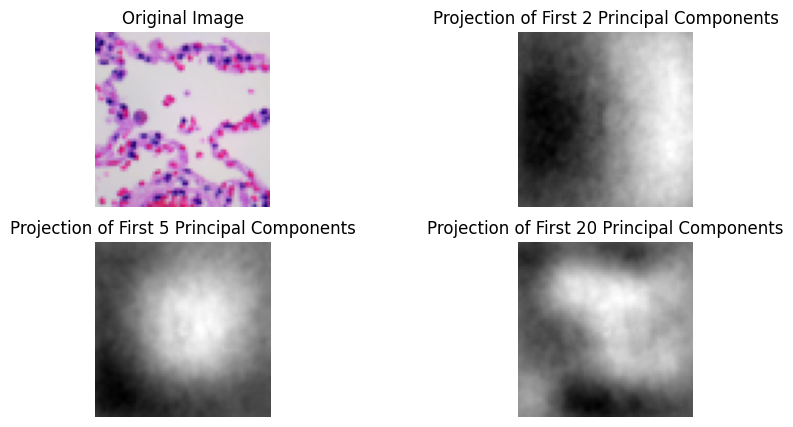

In [52]:
index = 10000
image_flat = images_scaled_gray[index]

pca_2 = PCA(n_components=2)
pca_2.fit(images_scaled_gray.reshape(images_scaled_gray.shape[0], -1))
image_pca_2 = pca_2.transform(image_flat.reshape(1, -1))

image_reconstructed_2 = pca_2.inverse_transform(image_pca_2)

image_reconstructed_reshaped_2 = image_reconstructed_2.reshape(64, 64)

pca_5 = PCA(n_components=5)
pca_5.fit(images_scaled_gray.reshape(images_scaled_gray.shape[0], -1))
image_pca_5 = pca_5.transform(image_flat.reshape(1, -1))

image_reconstructed_5 = pca_5.inverse_transform(image_pca_5)

image_reconstructed_reshaped_5 = image_reconstructed_5.reshape(64, 64)

pca_20 = PCA(n_components=20)
pca_20.fit(images_scaled_gray.reshape(images_scaled_gray.shape[0], -1))
image_pca_20 = pca_20.transform(image_flat.reshape(1, -1))

image_reconstructed_20 = pca_20.inverse_transform(image_pca_20)

image_reconstructed_reshaped_20 = image_reconstructed_20.reshape(64, 64)


plt.figure(figsize=(10, 5))

# Original image (assuming it's in RGB format)
plt.subplot(2, 2, 1)
plt.imshow(images[index].reshape(64, 64, 3).astype(np.uint8))
plt.title("Original Image")
plt.axis('off')

# Projection with 2 principal components
plt.subplot(2, 2, 2)
plt.imshow(image_reconstructed_reshaped_2, cmap=plt.cm.gray)
plt.title("Projection of First 2 Principal Components")
plt.axis('off')

# Projection with 5 principal components
plt.subplot(2, 2, 3)
plt.imshow(image_reconstructed_reshaped_5, cmap=plt.cm.gray)
plt.title("Projection of First 5 Principal Components")
plt.axis('off')

# Projection with 20 principal components
plt.subplot(2, 2, 4)
plt.imshow(image_reconstructed_reshaped_20, cmap=plt.cm.gray)
plt.title("Projection of First 20 Principal Components")
plt.axis('off')

plt.show()

## Train, Validation, Test split

In [53]:
# Apply PCA with 2 components
n_components = 2
pca_vis = PCA(n_components=n_components)
images_pca_gray = pca_vis.fit_transform(images_scaled_gray)

# Encode the labels to numerical values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data using the encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    images_pca_gray, labels_encoded, test_size=0.2, random_state=42)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2


## KNN

In [54]:



neighbor_range = range(1, 30)
best_score = 0
best_n_neighbors = 1



clf = Pipeline([
    ('scaler', StandardScaler()),
    ('kneighborsclassifier', KNeighborsClassifier())
])


for n_neighbors in neighbor_range:
    clf.set_params(kneighborsclassifier__n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)  

    y_val_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"n_neighbors = {n_neighbors}, Validation Accuracy: {accuracy:.7f}")

    if accuracy > best_score:
        best_score = accuracy
        best_n_neighbors = n_neighbors

print(f"Optimal number of neighbors: {best_n_neighbors}, with Validation Accuracy: {best_score:.7f}")

n_neighbors = 1, Validation Accuracy: 0.6870000
n_neighbors = 2, Validation Accuracy: 0.6543333
n_neighbors = 3, Validation Accuracy: 0.6930000
n_neighbors = 4, Validation Accuracy: 0.6883333
n_neighbors = 5, Validation Accuracy: 0.7066667
n_neighbors = 6, Validation Accuracy: 0.6970000
n_neighbors = 7, Validation Accuracy: 0.7056667
n_neighbors = 8, Validation Accuracy: 0.7056667
n_neighbors = 9, Validation Accuracy: 0.7190000
n_neighbors = 10, Validation Accuracy: 0.7160000
n_neighbors = 11, Validation Accuracy: 0.7170000
n_neighbors = 12, Validation Accuracy: 0.7180000
n_neighbors = 13, Validation Accuracy: 0.7126667
n_neighbors = 14, Validation Accuracy: 0.7093333
n_neighbors = 15, Validation Accuracy: 0.7150000
n_neighbors = 16, Validation Accuracy: 0.7083333
n_neighbors = 17, Validation Accuracy: 0.7123333
n_neighbors = 18, Validation Accuracy: 0.7126667
n_neighbors = 19, Validation Accuracy: 0.7150000
n_neighbors = 20, Validation Accuracy: 0.7130000
n_neighbors = 21, Validation 

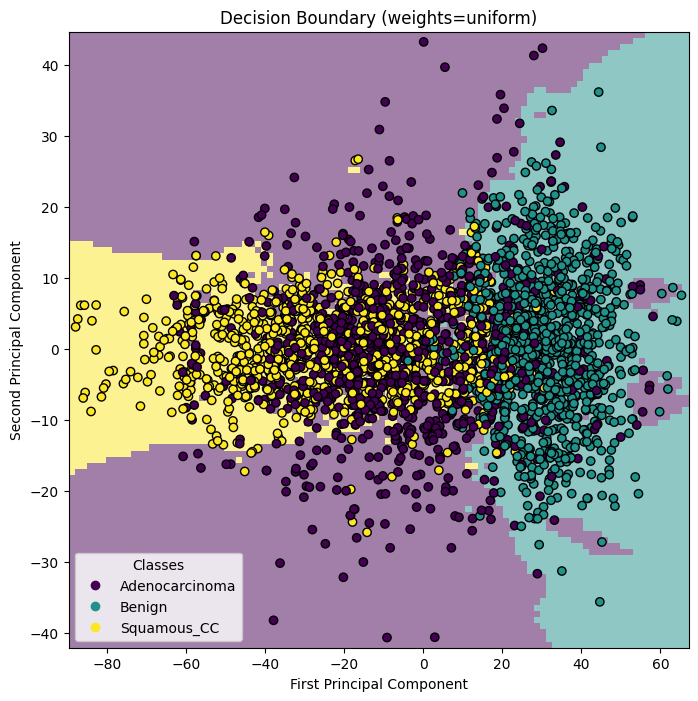

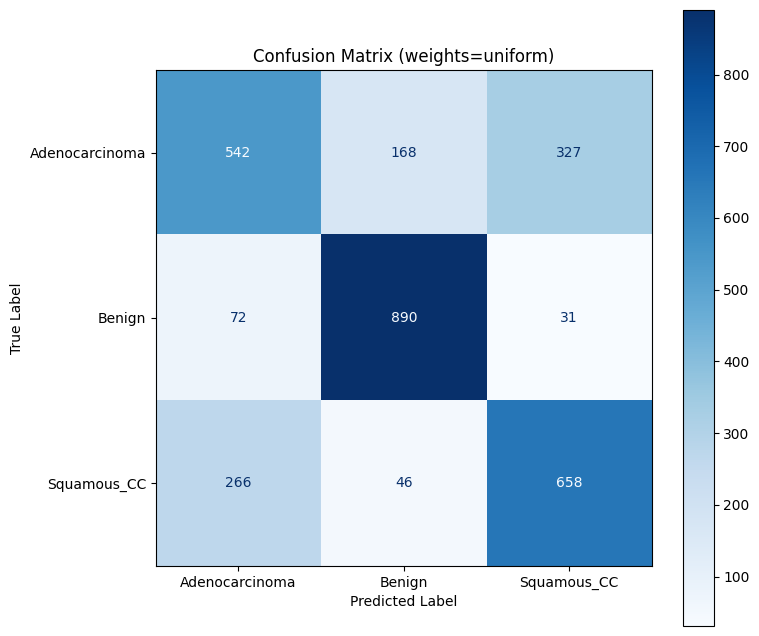

In [55]:




weight_settings = ["uniform"]
clf.set_params(kneighborsclassifier__n_neighbors=best_n_neighbors)



fig_decision, axs_decision = plt.subplots(1, 1, figsize=(8, 8))


fig_cm, axs_cm = plt.subplots(1, 1, figsize=(8, 8))


# for ax_decision, ax_cm, weights in zip(axs_decision, axs_cm, weight_settings):

clf.set_params(kneighborsclassifier__weights=weights).fit(X_train, y_train)


y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)


class_names = label_encoder.inverse_transform(np.unique(y_test))

# Plot the decision boundary
disp_decision = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_test,
    response_method="predict",
    plot_method="pcolormesh",
    xlabel='First Principal Component',
    ylabel='Second Principal Component',
    shading="auto",
    alpha=0.5,
    ax=axs_decision,
)


scatter = disp_decision.ax_.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, edgecolors="k", cmap='viridis'
)


handles = list(scatter.legend_elements()[0])
labels_list = list(label_encoder.inverse_transform(np.unique(y_test)))
disp_decision.ax_.legend(
    handles=handles,
    labels=labels_list,
    title="Classes",
    loc="lower left"
)
axs_decision.set_title(f"Decision Boundary (weights={weights})")


disp_cm = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=class_names)
disp_cm.plot(cmap='Blues', ax=axs_cm, values_format='d')
axs_cm.set_title(f'Confusion Matrix (weights={weights})')
axs_cm.set_xlabel('Predicted Label')
axs_cm.set_ylabel('True Label')

plt.show()

In [56]:

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)


                precision    recall  f1-score   support

Adenocarcinoma       0.62      0.52      0.57      1037
        Benign       0.81      0.90      0.85       993
   Squamous_CC       0.65      0.68      0.66       970

      accuracy                           0.70      3000
     macro avg       0.69      0.70      0.69      3000
  weighted avg       0.69      0.70      0.69      3000



In [57]:
model = svm.SVC(kernel='poly')
clf = model.fit(X_train, y_train)

In [58]:
def make_meshgrid(x, y, h=.1):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

/var/folders/71/_krxyrzs7sb77_634p5ptbmm0000gn/T/ipykernel_60581/336316497.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


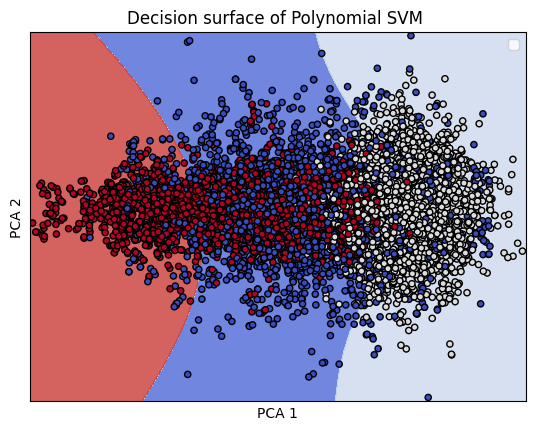

In [59]:
fig, ax = plt.subplots()

title = ('Decision surface of Polynomial SVM ')
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PCA 2')
ax.set_xlabel('PCA 1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

legend_labels = label_encoder.inverse_transform(
    np.unique(y_train))  # Original class labels
handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                      markerfacecolor=col, markersize=10)
           for label, col in zip(legend_labels, plt.cm.coolwarm(np.linspace(0, 1, len(legend_labels))))]

ax.legend(handles=handles, title="Classes")
ax.set_ylabel('Principal Component 1')
ax.set_xlabel('Principal Component 2')
ax.set_title(f'Decision Surface of Polynomial SVC')
plt.show()

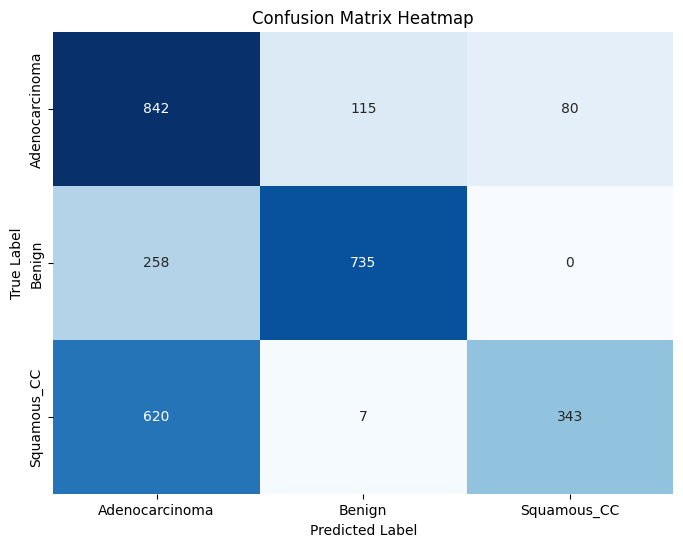

In [60]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [61]:
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

                precision    recall  f1-score   support

Adenocarcinoma       0.49      0.81      0.61      1037
        Benign       0.86      0.74      0.79       993
   Squamous_CC       0.81      0.35      0.49       970

      accuracy                           0.64      3000
     macro avg       0.72      0.64      0.63      3000
  weighted avg       0.72      0.64      0.63      3000



# Decision tree

/Users/henriquerio/miniconda3/envs/hw_env/lib/python3.12/site-packages/sklearn/inspection/_plot/decision_boundary.py:191: UserWarning: The following kwargs were not used by contour: 'lot_method', 'shading'
  self.surface_ = plot_func(self.xx0, self.xx1, self.response, **kwargs)


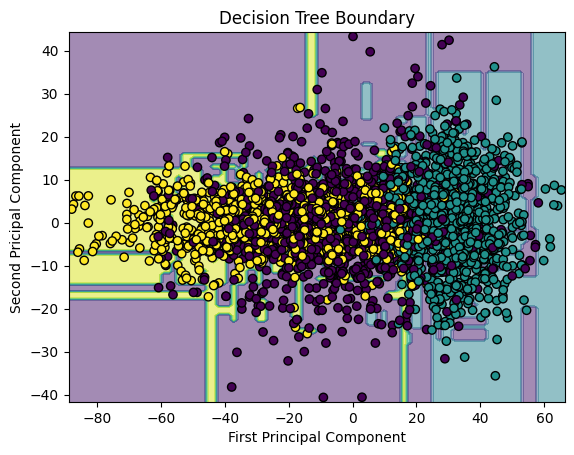

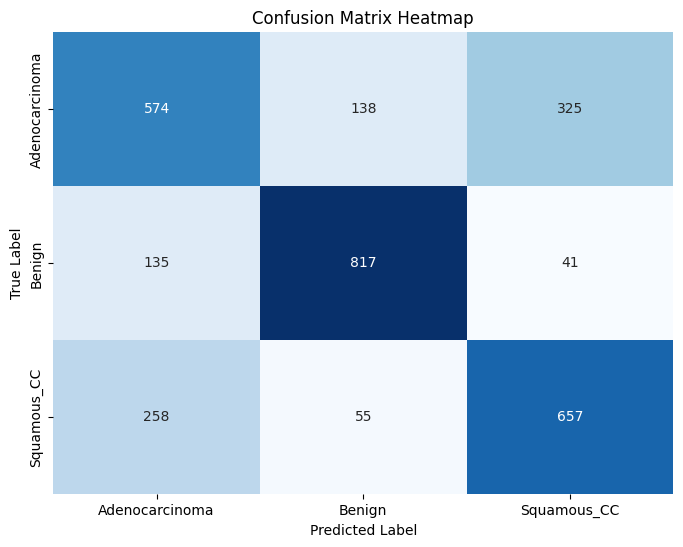

                precision    recall  f1-score   support

Adenocarcinoma       0.59      0.55      0.57      1037
        Benign       0.81      0.82      0.82       993
   Squamous_CC       0.64      0.68      0.66       970

      accuracy                           0.68      3000
     macro avg       0.68      0.68      0.68      3000
  weighted avg       0.68      0.68      0.68      3000



In [62]:



tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = tree.predict(X_test)
display = DecisionBoundaryDisplay.from_estimator(tree,X_test,response_method='predict',
                                                 lot_method='pcolormesh',xlabel='First Principal Component',
                                                 ylabel="Second Pricipal Component",
                                                 shading = 'auto',
                                                 alpha=0.5
)


display.ax_.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="black"
)
plt.title("Decision Tree Boundary")
plt.show()


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Generate a classification report
report = classification_report(y_test, y_pred, target_names=class_names)
print(report)

In [63]:

param_grid = {
    'n_estimators': [ 250,500, 1000],
    'max_depth': [10,20, 30, 50],
    'min_samples_split': [10,20, 30, 40]
}
rf = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
    
best_model = grid_search.best_estimator_
val_accuracy = best_model.score(X_val, y_val)
print("Validation Accuracy:", val_accuracy)

Best parameters: {'max_depth': 50, 'min_samples_split': 20, 'n_estimators': 1000}
Best score: 0.7324444444444443
Validation Accuracy: 0.7296666666666667


In [64]:
rf_pred = best_model.predict(X_test)

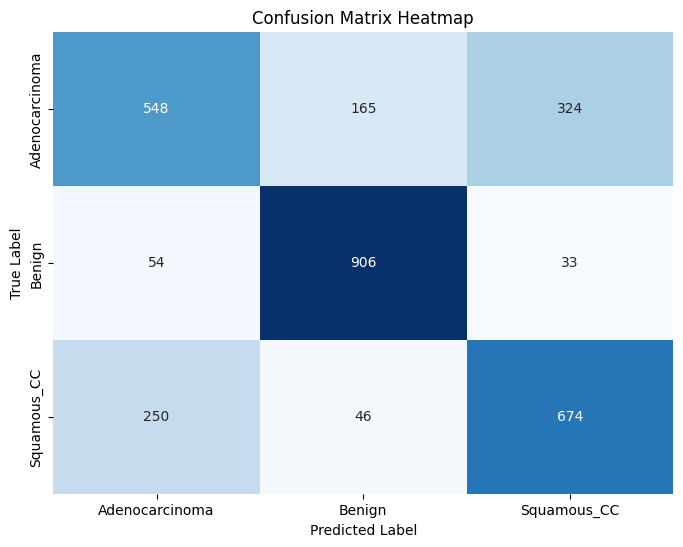

                precision    recall  f1-score   support

Adenocarcinoma       0.64      0.53      0.58      1037
        Benign       0.81      0.91      0.86       993
   Squamous_CC       0.65      0.69      0.67       970

      accuracy                           0.71      3000
     macro avg       0.70      0.71      0.70      3000
  weighted avg       0.70      0.71      0.70      3000



In [65]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Generate a classification report
report = classification_report(y_test, rf_pred, target_names=class_names)
print(report)

In [66]:
n_pcs = [5,10,15,50]

for i in n_pcs:
    print("-----------------------------------",i,"--------------------------------------")
    pc_fit = PCA(n_components=i)
    
    images_pca_gray_2 = pc_fit.fit_transform(images_scaled_gray)

# Encode the labels to numerical values
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

# Split the data using the encoded labels
    X_train_pc, X_test_pc, y_train_pc, y_test_pc = train_test_split(
        images_pca_gray_2, labels_encoded, test_size=0.2, random_state=42)
    X_train_pc, X_val_pc, y_train_pc, y_val_pc = train_test_split(
        X_train_pc, y_train_pc, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2
    
    rf_pc = RandomForestClassifier(n_estimators=500,min_samples_split=20,max_depth=30)

    rf_pc.fit(X_train_pc,y_train_pc)

    y_val_rf = rf_pc.predict(X_val_pc)
    accuracy_rf = accuracy_score(y_val_pc, y_val_rf)
    print(f"PCS = {i}, Validation Accuracy: {accuracy_rf:.7f}")

    print("-----------------------------------", i,"--------------------------------------")

----------------------------------- 5 --------------------------------------
PCS = 5, Validation Accuracy: 0.8090000
----------------------------------- 5 --------------------------------------
----------------------------------- 10 --------------------------------------
PCS = 10, Validation Accuracy: 0.8446667
----------------------------------- 10 --------------------------------------
----------------------------------- 15 --------------------------------------
PCS = 15, Validation Accuracy: 0.8496667
----------------------------------- 15 --------------------------------------
----------------------------------- 50 --------------------------------------
PCS = 50, Validation Accuracy: 0.8580000
----------------------------------- 50 --------------------------------------


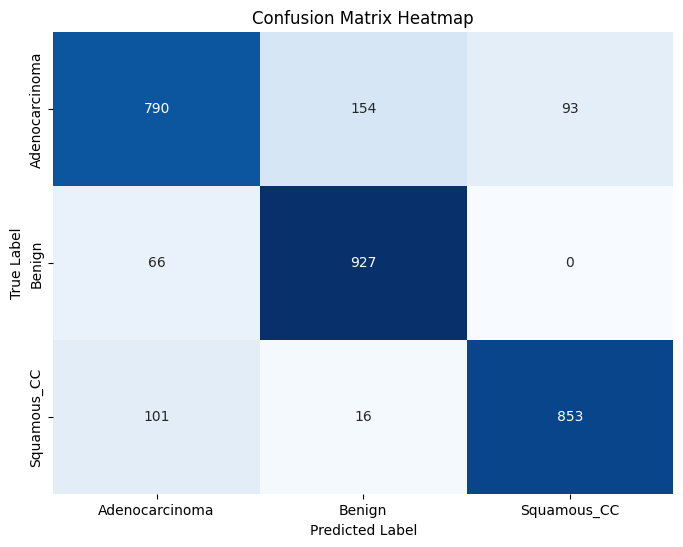

                precision    recall  f1-score   support

Adenocarcinoma       0.83      0.76      0.79      1037
        Benign       0.85      0.93      0.89       993
   Squamous_CC       0.90      0.88      0.89       970

      accuracy                           0.86      3000
     macro avg       0.86      0.86      0.86      3000
  weighted avg       0.86      0.86      0.86      3000



In [67]:
# Generate the confusion matrix
rf_pc_pred = rf_pc.predict(X_test_pc)

cm = confusion_matrix(y_test_pc, rf_pc_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


# Generate a classification report
report = classification_report(y_test_pc, rf_pc_pred, target_names=class_names)
print(report)